<div style="max-width:66ch;">

# Exercise - pandas fundamentals

---
These are introductory exercises in Pandas with focus in **syntax, DataFrame, indexing, data selection** and **data cleaning**.

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

</div>

<div style="max-width:66ch;">

## 0. Cities in Sweden - create dataset (*)

Create this DataFrame from scratch: 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Malmö     |       347949 |
|  1 | Stockholm |       975551 |
|  2 | Uppsala   |       233839 |
|  3 | Göteborg  |       583056 |

&nbsp; a) Use your DataFrame to print out all the cities. (*)

&nbsp; b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the three largest cities. (*)

&nbsp; e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city. 

</div>




In [1]:
import pandas as pd

data = {"Malmö": 347949, "Stockholm": 975551, "Uppsala": 233839, "Göteborg": 583056}

series = pd.Series(data)
series

Malmö        347949
Stockholm    975551
Uppsala      233839
Göteborg     583056
dtype: int64

In [2]:
df_programs = pd.DataFrame({"Kommun": [ "Malmö","Stockholm","Uppsala","Göteborg"], "Population": [347949, 975551, 233839, 583056]})
df_programs

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [3]:
goteborg_row = df_programs.query("Kommun == 'Göteborg'")

print(goteborg_row)

     Kommun  Population
3  Göteborg      583056


In [4]:
df_programs.sort_values(by="Population", ascending = False).head()

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


In [5]:
df_programs[df_programs["Population"] > 240000]

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
3,Göteborg,583056


In [6]:
total_population = 10379295

df_programs['Population %'] = (df_programs['Population'] / total_population) * 100

print(df_programs)

      Kommun  Population  Population %
0      Malmö      347949      3.352338
1  Stockholm      975551      9.399010
2    Uppsala      233839      2.252937
3   Göteborg      583056      5.617491


<div style="max-width:66ch;">

---


## 1. Cities in Sweden - real dataset (*)


Download the file komtopp50_2020.xlsx from the course github repo. The data is taken from SCB. 

&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

Feel free to do more explorations. (*)

&nbsp; b) Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the five smallest cities. (*)

&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities. (*) 


</div>




In [7]:
#1.a)

df = pd.read_excel("../data/komtopp50_2020.xlsx")

df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,"Sveriges 50 största kommuner efter folkmängd,",NaN,NaN,NaN,NaN,NaN
2,31 december 2020 jämfört med 31 december 2019,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Folkmängd 31 december,NaN,Förändring


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  54 non-null     object 
 1   Unnamed: 1  51 non-null     float64
 2   Unnamed: 2  51 non-null     object 
 3   Unnamed: 3  52 non-null     object 
 4   Unnamed: 4  51 non-null     float64
 5   Unnamed: 5  51 non-null     object 
dtypes: float64(2), object(4)
memory usage: 2.8+ KB


In [9]:
df.describe()

,Unnamed: 1,Unnamed: 4
count,51.000000,51.000000
mean,64.588235,121353.627451
std,279.518599,149002.409627
min,1.000000,2019.000000
25%,13.500000,61154.000000
50%,26.000000,84395.000000
75%,38.500000,113013.500000
max,2019.000000,974073.000000


In [10]:
file_path = "C:/Users/utjis/OneDrive - Handelsakademin/Python-Github/Python-Richard-Boden-OPA23/Data/komtopp50_2020.xlsx"

df_totalt = pd.read_excel(file_path, sheet_name='Totalt', skiprows=5)

df_totalt.head()

,Rang,Unnamed: 1,Kommun,Folkmängd 31 december,Unnamed: 4,Förändring
0,2020,2019,NaN,2020,2019,%
1,83,84,Ale,31868,31402,1.483982
2,64,64,Alingsås,41602,41420,0.439401
3,123,123,Alvesta,20224,20134,0.447005
4,255,255,Aneby,6821,6848,-0.394276


In [11]:
df_totalt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rang                   291 non-null    int64 
 1   Unnamed: 1             291 non-null    int64 
 2   Kommun                 290 non-null    object
 3   Folkmängd 31 december  291 non-null    int64 
 4   Unnamed: 4             291 non-null    int64 
 5   Förändring             291 non-null    object
dtypes: int64(4), object(2)
memory usage: 13.8+ KB


In [12]:
df.describe()

,Unnamed: 1,Unnamed: 4
count,51.000000,51.000000
mean,64.588235,121353.627451
std,279.518599,149002.409627
min,1.000000,2019.000000
25%,13.500000,61154.000000
50%,26.000000,84395.000000
75%,38.500000,113013.500000
max,2019.000000,974073.000000


In [13]:
#1.b)

df_totalt_new = pd.read_excel(file_path, sheet_name='Totalt', header=6) # justerar när datan börjar i excel arket. 7e raden [index 6 (header=6)]
df_totalt_new


,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740
...,...,...,...,...,...,...
285,54,55,Österåker,46644,45574,2.347830
286,116,115,Östhammar,22251,22250,0.004494
287,160,159,Östra Göinge,15017,15007,0.066636
288,284,284,Överkalix,3289,3315,-0.784314


In [14]:
df_totalt_new.columns = ['Rang 2020', 'Rang 2019', 'Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring'] #Byter namn på kolumner
df_totalt_new

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740
...,...,...,...,...,...,...
285,54,55,Österåker,46644,45574,2.347830
286,116,115,Östhammar,22251,22250,0.004494
287,160,159,Östra Göinge,15017,15007,0.066636
288,284,284,Överkalix,3289,3315,-0.784314


In [15]:
#1.c)

df_sorted = df_totalt_new.sort_values(by='Folkmängd 2020', ascending = False) # sorterar på högsta folkmängd "Folkmängd 2020"

df_sorted

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1,Stockholm,975551,974073,0.151734
57,2,2,Göteborg,583056,579281,0.651670
134,3,3,Malmö,347949,344166,1.099179
241,4,4,Uppsala,233839,230767,1.331213
124,5,5,Linköping,164616,163051,0.959822
...,...,...,...,...,...,...
271,286,286,Åsele,2805,2794,0.393701
5,287,287,Arjeplog,2718,2785,-2.405745
29,288,288,Dorotea,2498,2551,-2.077617
194,289,289,Sorsele,2442,2489,-1.888309


In [16]:
#1.d)

df_5smallest = df_totalt_new.sort_values(by="Folkmängd 2020", ascending=True).head() # Sorterar på lägsta folkmängd "Folkmängd 2020"
df_5smallest

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
12,290,290,Bjurholm,2387,2408,-0.872093
194,289,289,Sorsele,2442,2489,-1.888309
29,288,288,Dorotea,2498,2551,-2.077617
5,287,287,Arjeplog,2718,2785,-2.405745
271,286,286,Åsele,2805,2794,0.393701


In [17]:
df_5biggest = df_totalt_new.sort_values(by="Folkmängd 2020", ascending=False).head()
df_5biggest

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1,Stockholm,975551,974073,0.151734
57,2,2,Göteborg,583056,579281,0.651670
134,3,3,Malmö,347949,344166,1.099179
241,4,4,Uppsala,233839,230767,1.331213
124,5,5,Linköping,164616,163051,0.959822


In [18]:
#1.e)

df_totalt_new['sum'] = df_totalt_new['Folkmängd 2020'] + df_totalt_new['Folkmängd 2019'] # gör en ny kolumn och räknar ihop "folkmängd 19 och 20"
df_totalt_new


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,sum
0,83,84,Ale,31868,31402,1.483982,63270
1,64,64,Alingsås,41602,41420,0.439401,83022
2,123,123,Alvesta,20224,20134,0.447005,40358
3,255,255,Aneby,6821,6848,-0.394276,13669
4,169,167,Arboga,14039,14087,-0.340740,28126
...,...,...,...,...,...,...,...
285,54,55,Österåker,46644,45574,2.347830,92218
286,116,115,Östhammar,22251,22250,0.004494,44501
287,160,159,Östra Göinge,15017,15007,0.066636,30024
288,284,284,Överkalix,3289,3315,-0.784314,6604


In [19]:
total_population_2019 = df_totalt_new['Folkmängd 2019'].sum()
total_population_2019

10327589

In [20]:
total_population_2020 = df_totalt_new['Folkmängd 2020'].sum()
total_population_2020

10379295

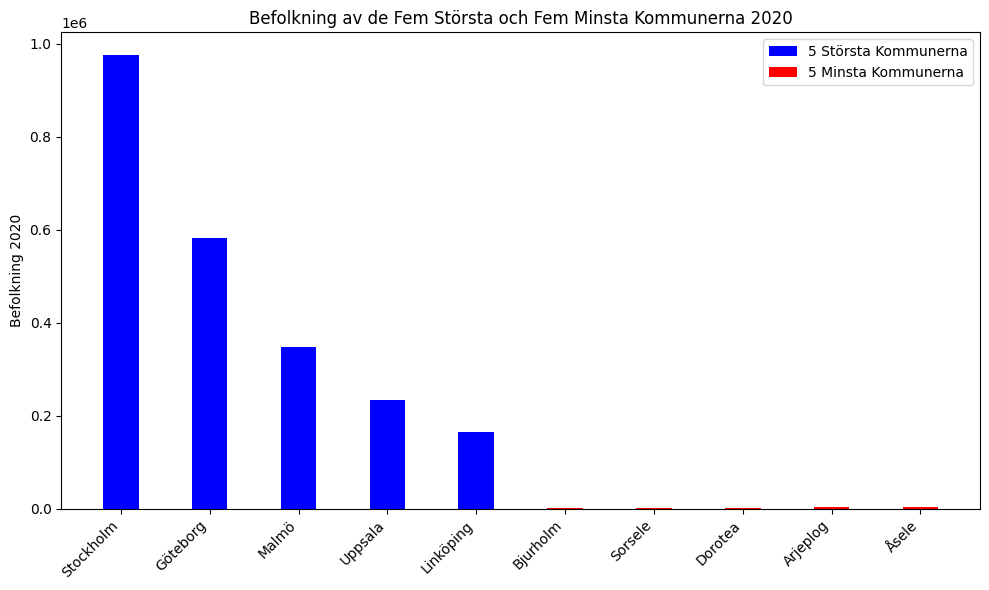

In [21]:
#1.f)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sätter storleken på plotten för bättre synlighet
plt.figure(figsize=(10, 6))

# Namn på kommuner för x-axelns etiketter
names_largest = df_5biggest['Kommun'].tolist()  # Konverterar till lista för plottning
names_smallest = df_5smallest['Kommun'].tolist()  # Konverterar till lista för plottning

# Rättar till variabelnamnen för befolkningsdata
population_largest = df_5biggest['Folkmängd 2020'].tolist()  # Rättar till variabelnamnen och konverterar till lista
population_smallest = df_5smallest['Folkmängd 2020'].tolist()  # Rättar till variabelnamnen och konverterar till lista

# Positioner för varje stapel
positions_largest = range(len(names_largest))  # Skapar positioner för de största kommunernas staplar
positions_smallest = [x + len(names_largest) for x in range(len(names_smallest))]  # Justerar positionerna för de minsta kommunernas staplar för kontinuitet

# Plottar de största kommunerna
plt.bar(positions_largest, population_largest, width=0.4, label='5 Största Kommunerna', color='blue')

# Plottar de minsta kommunerna
plt.bar(positions_smallest, population_smallest, width=0.4, label='5 Minsta Kommunerna', color='red')

# Sätter etiketter på x-axeln
plt.xticks(list(positions_largest) + list(positions_smallest), names_largest + names_smallest, rotation=45, ha="right")

# Lägger till etiketter och titel
plt.ylabel('Befolkning 2020')  # Sätter etikett för y-axeln
plt.title('Befolkning av de Fem Största och Fem Minsta Kommunerna 2020')  # Sätter titel på plotten
plt.legend()  # Visar en förklaring

plt.tight_layout()  # Justerar layouten för att allt ska få plats
plt.show()  # Visar plotten


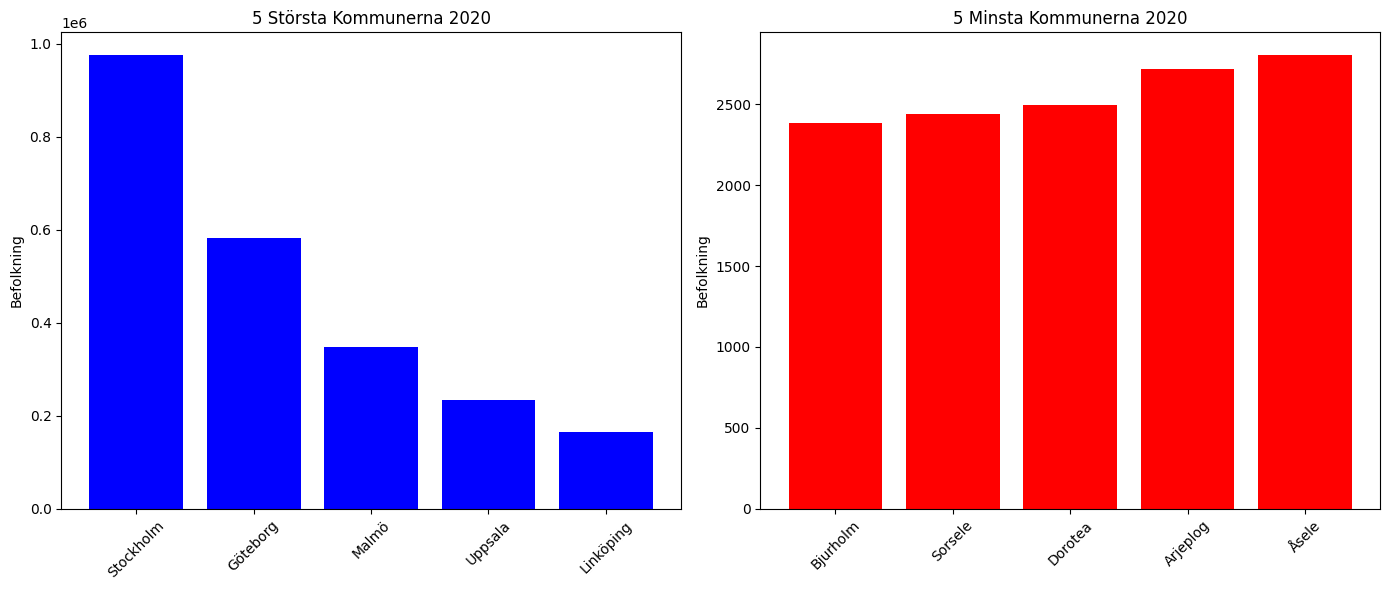

In [22]:
# Förbered data
names_largest = df_5biggest['Kommun']  # Hämtar kommunnamnen för de 5 största kommunerna
populations_largest = df_5biggest['Folkmängd 2020']  # Hämtar befolkningsstorleken för 2020 för de 5 största kommunerna
names_smallest = df_5smallest['Kommun']  # Hämtar kommunnamnen för de 5 minsta kommunerna
populations_smallest = df_5smallest['Folkmängd 2020']  # Hämtar befolkningsstorleken för 2020 för de 5 minsta kommunerna

# Skapa subplots: 1 rad, 2 kolumner
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))  # Skapar en figur och två diagram bredvid varandra

# Plotta för de 5 största kommunerna
axes[0].bar(names_largest, populations_largest, color='blue')  # Skapar ett stapeldiagram för de 5 största kommunerna i blått
axes[0].set_title('5 Största Kommunerna 2020')  # Sätter titeln på det första diagrammet
axes[0].set_ylabel('Befolkning')  # Sätter y-axelns etikett för det första diagrammet
axes[0].tick_params(axis='x', rotation=45)  # Roterar texten på x-axeln för bättre läsbarhet

# Plotta för de 5 minsta kommunerna
axes[1].bar(names_smallest, populations_smallest, color='red')  # Skapar ett stapeldiagram för de 5 minsta kommunerna i rött
axes[1].set_title('5 Minsta Kommunerna 2020')  # Sätter titeln på det andra diagrammet
axes[1].set_ylabel('Befolkning')  # Sätter y-axelns etikett för det andra diagrammet
axes[1].tick_params(axis='x', rotation=45)  # Roterar texten på x-axeln för bättre läsbarhet

# Justera layouten automatiskt för att säkerställa att diagrammen får plats och är läsbara
plt.tight_layout()

# Visa diagrammet
plt.show()

In [23]:
#2.a)

df_men = pd.read_excel(file_path, sheet_name='Män', header=6) # justerar när datan börjar i excel arket. 7e raden [index 6 (header=6)]
df_men
df_women = pd.read_excel(file_path, sheet_name='Kvinnor', header=6)
df_women

,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,84,85,Ale,15612,15348,1.720094
1,64,64,Alingsås,20900,20774,0.606527
2,123,123,Alvesta,9857,9795,0.632976
3,255,255,Aneby,3318,3350,-0.955224
4,165,164,Arboga,6945,6973,-0.401549
...,...,...,...,...,...,...
285,55,57,Österåker,22997,22442,2.473042
286,117,118,Östhammar,10846,10803,0.398038
287,160,159,Östra Göinge,7270,7262,0.110162
288,284,284,Överkalix,1559,1578,-1.204056


In [24]:
df_men.columns = ['Rang 2020', 'Rang 2019', 'Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring'] #Byter namn på kolumner
df_women.columns = ['Rang 2020', 'Rang 2019', 'Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring'] #Byter namn på kolumner
df_women

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,84,85,Ale,15612,15348,1.720094
1,64,64,Alingsås,20900,20774,0.606527
2,123,123,Alvesta,9857,9795,0.632976
3,255,255,Aneby,3318,3350,-0.955224
4,165,164,Arboga,6945,6973,-0.401549
...,...,...,...,...,...,...
285,55,57,Österåker,22997,22442,2.473042
286,117,118,Östhammar,10846,10803,0.398038
287,160,159,Östra Göinge,7270,7262,0.110162
288,284,284,Överkalix,1559,1578,-1.204056


In [25]:
df_men.insert(6, "Kön", "Man") #lägger till en kolumn som heter kön och sätter värdet till 'Man'
df_women.insert(6, "Kön", "Kvinna")


In [26]:
df_men.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,81,83,Ale,16256,16054,1.258253,Man
1,64,64,Alingsås,20702,20646,0.271239,Man
2,122,123,Alvesta,10367,10339,0.270819,Man
3,255,255,Aneby,3503,3498,0.142939,Man
4,169,168,Arboga,7094,7114,-0.281136,Man


In [27]:
#2.b)

df_togheter = pd.concat([df_men, df_women]) # Sammanfogar båda dataframesen till en med hjälp av pd.concat
df_togheter_kommun = df_togheter.set_index('Kommun') # sätter index till kommun
df_togheter_kommun



,Rang 2020,Rang 2019,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
Kommun,,,,,,
Ale,81,83,16256,16054,1.258253,Man
Alingsås,64,64,20702,20646,0.271239,Man
Alvesta,122,123,10367,10339,0.270819,Man
Aneby,255,255,3503,3498,0.142939,Man
Arboga,169,168,7094,7114,-0.281136,Man
...,...,...,...,...,...,...
Österåker,55,57,22997,22442,2.473042,Kvinna
Östhammar,117,118,10846,10803,0.398038,Kvinna
Östra Göinge,160,159,7270,7262,0.110162,Kvinna


In [28]:
#2.c)

df_new_names = df_togheter_kommun.rename(columns={
    'Folkmängd 2020': 'Total Pop 2020',
    'Folkmängd 2019': 'Total Pop 2019',
    'Förändring': 'Total förändring'
})

df_new_names

,Rang 2020,Rang 2019,Total Pop 2020,Total Pop 2019,Total förändring,Kön
Kommun,,,,,,
Ale,81,83,16256,16054,1.258253,Man
Alingsås,64,64,20702,20646,0.271239,Man
Alvesta,122,123,10367,10339,0.270819,Man
Aneby,255,255,3503,3498,0.142939,Man
Arboga,169,168,7094,7114,-0.281136,Man
...,...,...,...,...,...,...
Österåker,55,57,22997,22442,2.473042,Kvinna
Östhammar,117,118,10846,10803,0.398038,Kvinna
Östra Göinge,160,159,7270,7262,0.110162,Kvinna


In [29]:
# Byter namn på några kolumner
df_totalt_newnames = df_totalt_new.rename(columns={
    'Folkmängd 2020': 'Total Pop 2020',
    'Folkmängd 2019': 'Total Pop 2019',
    'Förändring': 'Total förändring'
})

df_totalt_newnames

,Rang 2020,Rang 2019,Kommun,Total Pop 2020,Total Pop 2019,Total förändring,sum
0,83,84,Ale,31868,31402,1.483982,63270
1,64,64,Alingsås,41602,41420,0.439401,83022
2,123,123,Alvesta,20224,20134,0.447005,40358
3,255,255,Aneby,6821,6848,-0.394276,13669
4,169,167,Arboga,14039,14087,-0.340740,28126
...,...,...,...,...,...,...,...
285,54,55,Österåker,46644,45574,2.347830,92218
286,116,115,Östhammar,22251,22250,0.004494,44501
287,160,159,Östra Göinge,15017,15007,0.066636,30024
288,284,284,Överkalix,3289,3315,-0.784314,6604


In [30]:
# visar (extract) endast de kolumner jag vill se
df_total_c = df_totalt_newnames[['Kommun', 'Total Pop 2020', 'Total Pop 2019', 'Total förändring']]
df_total_c.head()

,Kommun,Total Pop 2020,Total Pop 2019,Total förändring
0,Ale,31868,31402,1.483982
1,Alingsås,41602,41420,0.439401
2,Alvesta,20224,20134,0.447005
3,Aneby,6821,6848,-0.394276
4,Arboga,14039,14087,-0.340740


In [31]:
#2.d)


df_merged = pd.merge(df_togheter_kommun, df_total_c, on='Kommun', how='left')
df_merged_kommun = df_merged.set_index('Kommun')
df_complete = df_merged_kommun[['Folkmängd 2020', 'Folkmängd 2019', 'Förändring', 'Kön', 'Total Pop 2020', 'Total Pop 2019', 'Total förändring' ]]
df_complete


,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring
Kommun,,,,,,,
Ale,16256,16054,1.258253,Man,31868,31402,1.483982
Alingsås,20702,20646,0.271239,Man,41602,41420,0.439401
Alvesta,10367,10339,0.270819,Man,20224,20134,0.447005
Aneby,3503,3498,0.142939,Man,6821,6848,-0.394276
Arboga,7094,7114,-0.281136,Man,14039,14087,-0.340740
...,...,...,...,...,...,...,...
Österåker,22997,22442,2.473042,Kvinna,46644,45574,2.347830
Östhammar,10846,10803,0.398038,Kvinna,22251,22250,0.004494
Östra Göinge,7270,7262,0.110162,Kvinna,15017,15007,0.066636


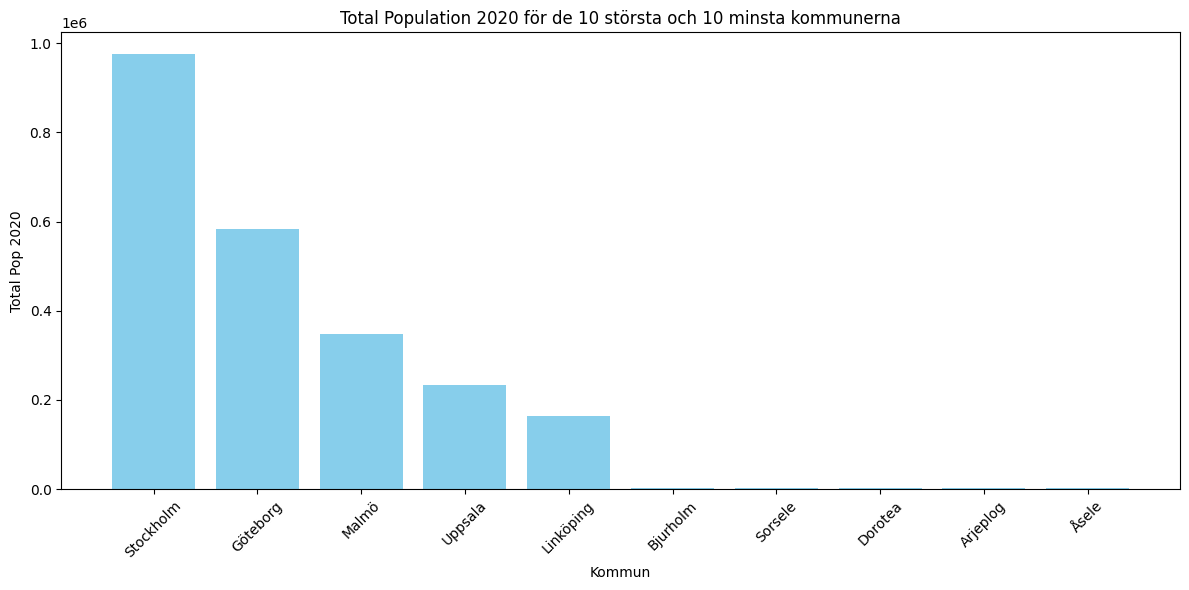

In [32]:
#2.e)
import pandas as pd
import matplotlib.pyplot as plt

# Identifiera de 10 största och 10 minsta kommunerna baserat på 'Total Pop 2020'
top_10 = df_complete.nlargest(10, 'Total Pop 2020')
bottom_10 = df_complete.nsmallest(10, 'Total Pop 2020')

# Kombinera top 10 och bottom 10 för visualisering
combined = pd.concat([top_10, bottom_10])

# Skapa en barplot
plt.figure(figsize=(12, 6))
# Använd index för x-värdena eftersom 'Kommun' är indexet
plt.bar(combined.index, combined['Total Pop 2020'], color='skyblue')
plt.title('Total Population 2020 för de 10 största och 10 minsta kommunerna')
plt.xlabel('Kommun')
plt.ylabel('Total Pop 2020')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


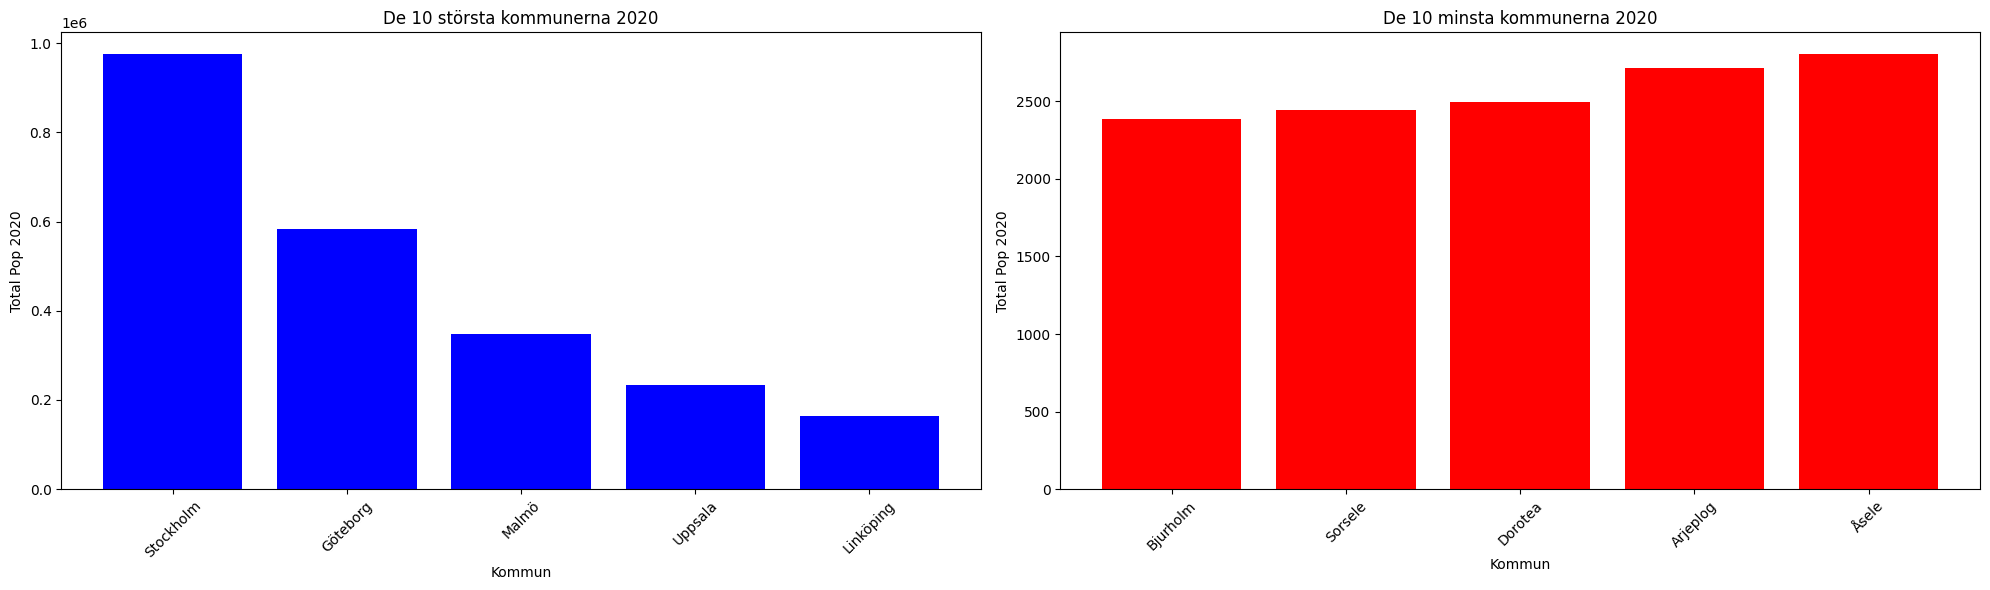

In [33]:
# Identifiera de 10 största och 10 minsta kommunerna baserat på 'Total Pop 2020'
top_10 = df_complete.nlargest(10, 'Total Pop 2020')
bottom_10 = df_complete.nsmallest(10, 'Total Pop 2020')

# Skapa en figur och två subplots, sida vid sida
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Första subplot för de 10 största kommunerna
ax1.bar(top_10.index, top_10['Total Pop 2020'], color='blue')
ax1.set_title('De 10 största kommunerna 2020')
ax1.set_xlabel('Kommun')
ax1.set_ylabel('Total Pop 2020')
ax1.tick_params(axis='x', rotation=45)

# Andra subplot för de 10 minsta kommunerna
ax2.bar(bottom_10.index, bottom_10['Total Pop 2020'], color='red')
ax2.set_title('De 10 minsta kommunerna 2020')
ax2.set_xlabel('Kommun')
ax2.set_ylabel('Total Pop 2020')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [34]:
#2.f)

df_male_pop_2020 = df_complete[df_complete['Kön'] == 'Man'] # Filtrera DataFrame för rader där Kön är 'Man'
df_total_male_pop_2020 = df_male_pop_2020['Folkmängd 2020'].sum() # Summera 'Folkmängd 2020' för att få den totala manliga populationen 2020

df_total_male_pop_2020

5222847

In [35]:
df_female_pop_2020 = df_complete[df_complete['Kön'] == 'Kvinnor']
df_total_female_pop_2020 = df_female_pop_2020['Folkmängd 2020'].sum()
df_total_female_pop_2020

0

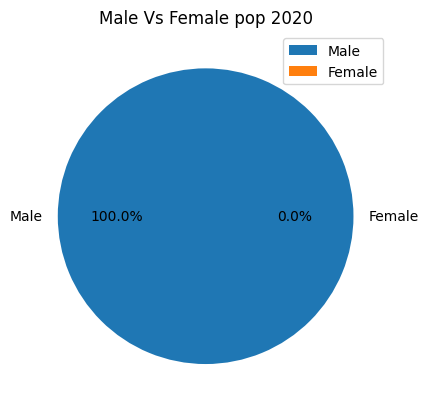

In [36]:

combined_male_female_pop_2020 = [df_total_male_pop_2020, df_total_female_pop_2020]

mylabels = ["Male", "Female"]


plt.pie(combined_male_female_pop_2020, labels= mylabels,  autopct='%1.1f%%')
plt.title("Male Vs Female pop 2020")
plt.legend()

plt.show()

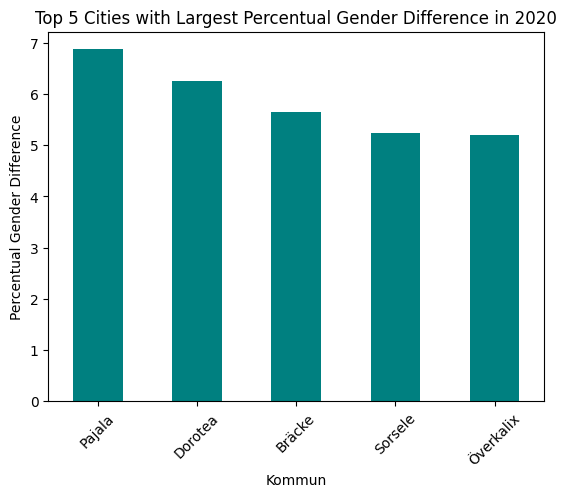

In [37]:
#2.g)

# Steg 1: Beräkna den totala populationen för män och kvinnor separat per stad
pop_per_gender = df_complete.groupby(['Kommun', 'Kön'])['Folkmängd 2020'].sum().unstack()

# Steg 2: Beräkna den procentuella könsskillnaden
# Antag att vi definierar den procentuella skillnaden som |(män - kvinnor) / total| * 100
pop_per_gender['Percentual Difference'] = abs((pop_per_gender['Man'] - pop_per_gender['Kvinna']) / (pop_per_gender['Man'] + pop_per_gender['Kvinna'])) * 100

# Steg 3: Sortera baserat på den procentuella skillnaden och välj de fem största
top_5_gender_difference = pop_per_gender.nlargest(5, 'Percentual Difference')

# Steg 4: Skapa en barplot för dessa städer
top_5_gender_difference['Percentual Difference'].plot(kind='bar', color='teal')
plt.title('Top 5 Cities with Largest Percentual Gender Difference in 2020')
plt.xlabel('Kommun')
plt.ylabel('Percentual Gender Difference')
plt.xticks(rotation=45)
plt.show()

C:\Users\utjis\AppData\Local\Temp\ipykernel_25780\2878073555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['Growth'] = df_complete['Folkmängd 2020'] - df_complete['Folkmängd 2019']


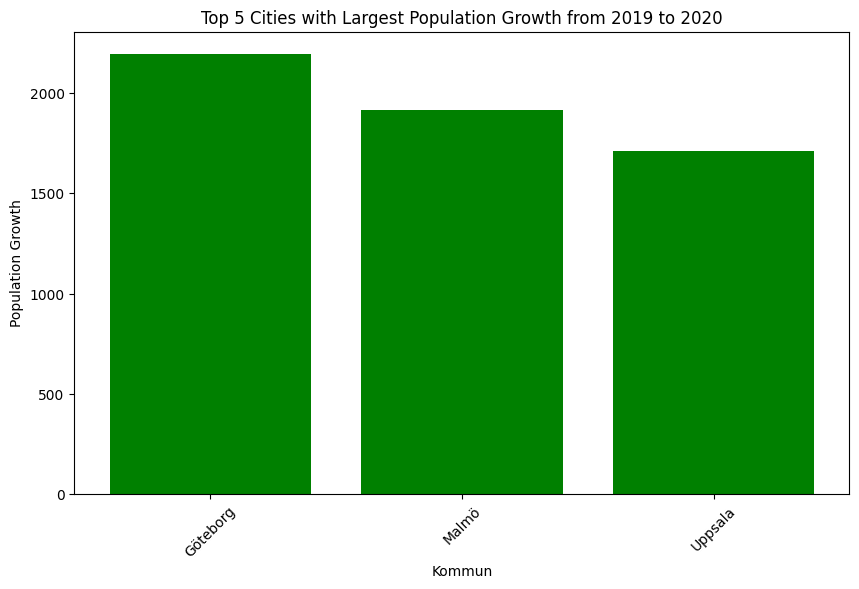

In [38]:
# Steg 1: Beräkna befolkningstillväxten för varje stad
df_complete['Growth'] = df_complete['Folkmängd 2020'] - df_complete['Folkmängd 2019']

# Steg 2: Sortera städerna baserat på tillväxt och välj de fem största
top_5_growth_cities = df_complete.sort_values(by='Growth', ascending=False).head(5)

'''
felmeddelande av denna då Kommun är index
# Steg 3: Skapa en barplot för dessa städer
plt.figure(figsize=(10, 6))
plt.bar(top_5_growth_cities['Kommun'], top_5_growth_cities['Growth'], color='green')
plt.title('Top 5 Cities with Largest Population Growth from 2019 to 2020')
plt.xlabel('Kommun')
plt.ylabel('Population Growth')
plt.xticks(rotation=45)
plt.show()
'''
# Steg 3: Skapa en barplot för dessa städer
plt.figure(figsize=(10, 6))
plt.bar(top_5_growth_cities.index, top_5_growth_cities['Growth'], color='green')  # Ändra 'Kommun' till index
plt.title('Top 5 Cities with Largest Population Growth from 2019 to 2020')
plt.xlabel('Kommun')
plt.ylabel('Population Growth')
plt.xticks(rotation=45)  # Säkerställer att kommunnamnen är lättlästa
plt.show()

## Detta ger bara 3 staplar 

In [57]:
df_complete

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring,Growth
Kommun,,,,,,,,
Ale,16256,16054,1.258253,Man,31868,31402,1.483982,202
Alingsås,20702,20646,0.271239,Man,41602,41420,0.439401,56
Alvesta,10367,10339,0.270819,Man,20224,20134,0.447005,28
Aneby,3503,3498,0.142939,Man,6821,6848,-0.394276,5
Arboga,7094,7114,-0.281136,Man,14039,14087,-0.340740,-20
...,...,...,...,...,...,...,...,...
Österåker,22997,22442,2.473042,Kvinna,46644,45574,2.347830,555
Östhammar,10846,10803,0.398038,Kvinna,22251,22250,0.004494,43
Östra Göinge,7270,7262,0.110162,Kvinna,15017,15007,0.066636,8


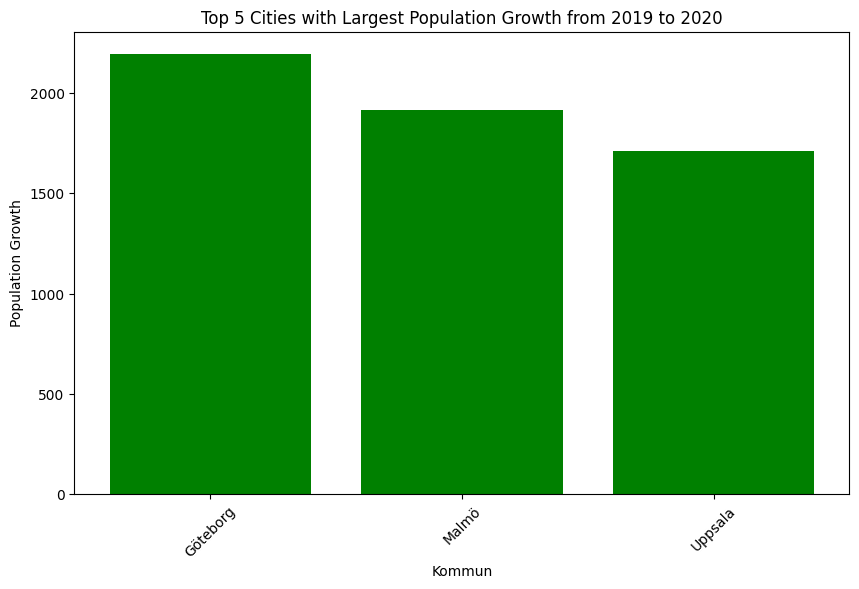

In [58]:
# Välj de fem kommuner med störst tillväxt
top_5_growth = df_complete.nlargest(5, 'Growth')

# Skapa barplot
plt.figure(figsize=(10, 6))
plt.bar(top_5_growth.index, top_5_growth['Growth'], color='green')
plt.title('Top 5 Cities with Largest Population Growth from 2019 to 2020')
plt.xlabel('Kommun')
plt.ylabel('Population Growth')
plt.xticks(rotation=45)  # Roterar texten för x-axeln för bättre läsbarhet
plt.show()


In [60]:
print(df_complete['Growth'].nlargest(10)) # män och kvinnor är separerade på growth däför visas vissa städer fler ggr


Kommun
Göteborg     2197
Malmö        1915
Malmö        1868
Uppsala      1713
Göteborg     1578
Uppsala      1359
Linköping     872
Haninge       822
Västerås      796
Jönköping     794
Name: Growth, dtype: int64


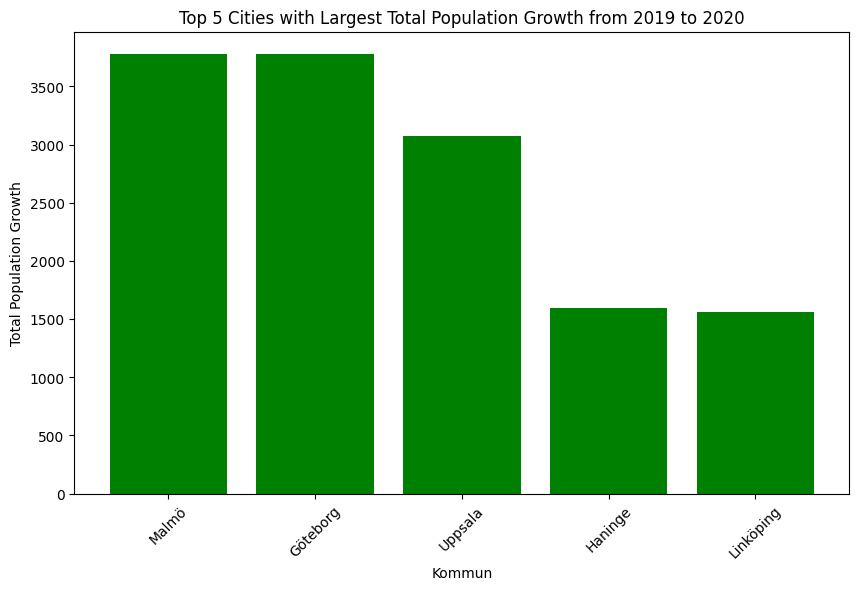

In [61]:
# Aggregera data för att kombinera tillväxten för män och kvinnor per stad
df_aggregated = df_complete.groupby(df_complete.index).agg({'Growth': 'sum'})

# Välj de fem städer med störst total tillväxt
top_5_total_growth = df_aggregated.nlargest(5, 'Growth')

# Skapa barplot
plt.figure(figsize=(10, 6))
plt.bar(top_5_total_growth.index, top_5_total_growth['Growth'], color='green')
plt.title('Top 5 Cities with Largest Total Population Growth from 2019 to 2020')
plt.xlabel('Kommun')
plt.ylabel('Total Population Growth')
plt.xticks(rotation=45)
plt.show()

<div style="max-width:66ch;">

---

## 2. Cities in Sweden - gender (\*)

We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames. In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

&nbsp; a) Clean your data so that the head looks like this: (\*)

Male:

|     | Rang 2020 | Rang 2019 | Kommun   | Folkmängd 2020 | Folkmängd 2019 | Förändring | Kön |
| --: | --------: | --------: | :------- | -------------: | -------------: | ---------: | :-- |
|   0 |        81 |        83 | Ale      |          16256 |          16054 |    1.25825 | Man |
|   1 |        64 |        64 | Alingsås |          20702 |          20646 |   0.271239 | Man |
|   2 |       122 |       123 | Alvesta  |          10367 |          10339 |   0.270819 | Man |
|   3 |       255 |       255 | Aneby    |           3503 |           3498 |   0.142939 | Man |
|   4 |       169 |       168 | Arboga   |           7094 |           7114 |  -0.281136 | Man |

Female:

|     | Rang 2020 | Rang 2019 | Kommun   | Folkmängd 2020 | Folkmängd 2019 | Förändring | Kön    |
| --: | --------: | --------: | :------- | -------------: | -------------: | ---------: | :----- |
|   0 |        84 |        85 | Ale      |          15612 |          15348 |    1.72009 | Kvinna |
|   1 |        64 |        64 | Alingsås |          20900 |          20774 |   0.606527 | Kvinna |
|   2 |       123 |       123 | Alvesta  |           9857 |           9795 |   0.632976 | Kvinna |
|   3 |       255 |       255 | Aneby    |           3318 |           3350 |  -0.955224 | Kvinna |
|   4 |       165 |       164 | Arboga   |           6945 |           6973 |  -0.401549 | Kvinna |

&nbsp; b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now. (\*)

|     Kommun | Folkmängd 2020 | Folkmängd 2019 | Förändring |    Kön |
| ---------: | :------------- | -------------: | ---------: | -----: |
|        Ale | 16256          |          16054 |    1.25825 |    Man |
|   Alingsås | 20702          |          20646 |   0.271239 |    Man |
|        ... | ...            |            ... |        ... |    ... |
|  Överkalix | 1559           |           1578 |   -1.20406 | Kvinna |
| Övertorneå | 2027           |           2065 |   -1.84019 | Kvinna |

&nbsp; c) Extract and change column name from the total DataFrame so that the head look like this: (\*)

|     | Kommun   | Total Pop 2020 | Total Pop 2019 | Total förändring |
| --: | :------- | -------------: | -------------: | ---------------: |
|   0 | Ale      |          31868 |          31402 |          1.48398 |
|   1 | Alingsås |          41602 |          41420 |         0.439401 |
|   2 | Alvesta  |          20224 |          20134 |         0.447005 |
|   3 | Aneby    |           6821 |           6848 |        -0.394276 |
|   4 | Arboga   |          14039 |          14087 |         -0.34074 |

&nbsp; d) Merge this data with the data in b) so that the head look like this: (\*)

| Kommun    | Folkmängd 2020 | Folkmängd 2019 | Förändring | Kön    | Total Pop 2020 | Total Pop 2019 | Total förändring |
| :-------- | -------------: | -------------: | ---------: | :----- | -------------: | -------------: | ---------------: |
| Stockholm |         482982 |         482220 |   0.158019 | Man    |         975551 |         974073 |         0.151734 |
| Stockholm |         492569 |         491853 |   0.145572 | Kvinna |         975551 |         974073 |         0.151734 |
| Göteborg  |         292505 |         290308 |   0.756782 | Man    |         583056 |         579281 |          0.65167 |
| Göteborg  |         290551 |         288973 |   0.546072 | Kvinna |         583056 |         579281 |          0.65167 |
| Malmö     |         175411 |         173543 |    1.07639 | Kvinna |         347949 |         344166 |          1.09918 |

&nbsp; e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities. (\*)

&nbsp; f) Create a pie chart showing the total male and female population in Sweden 2020. (\*)

&nbsp; g) Create a barplot showing the cities with the five largest percentual gender difference in 2020. (\*\*)

&nbsp; h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (\*\*)

&nbsp; i) Feel free to investigate other questions you are interested in using these datasets. (\*), (\*\*)

</div>


<div style="width: 66ch;">


</div>

<div style="background-color: #FFF; color: #212121; border-radius: 20px; width:25ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1em; width: 60%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
    <div>
</div>